In [2]:
import pandas as pd

In [3]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['Jakarta', 'Bandung', 'Surabaya']
}
df = pd.DataFrame(data)

In [9]:
df = pd.DataFrame(data)
print(df)

      Name  Age      City
0    Alice   25   Jakarta
1      Bob   30   Bandung
2  Charlie   22  Surabaya


In [10]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


,Name,Age,City
count,3,3.000000,3
unique,3,NaN,3
top,Alice,NaN,Jakarta
freq,1,NaN,1
mean,NaN,25.666667,NaN
std,NaN,4.041452,NaN
min,NaN,22.000000,NaN
25%,NaN,23.500000,NaN
50%,NaN,25.000000,NaN
75%,NaN,27.500000,NaN


In [20]:
data1 = pd.read_csv('sales_data_sample.csv', encoding='latin1')
data1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [32]:
data1.shape
data1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [44]:
# Convert date
data1['ORDERDATE'] = pd.to_datetime(data1['ORDERDATE'])

# Create month collumn
data1['MONTH'] = data1['ORDERDATE'].dt.month

# Calculate monthly sales
monthly_sales = data1.groupby('MONTH')['SALES'].sum()
print(monthly_sales)

MONTH
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64


<Axes: title={'center': 'Monthly Sales'}, xlabel='MONTH'>

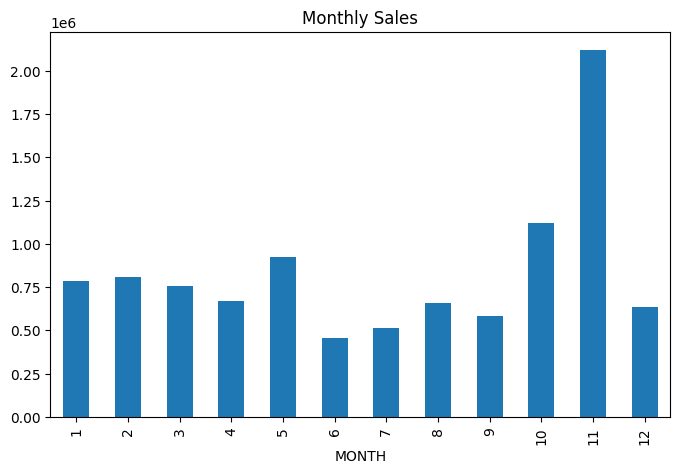

In [47]:
# Plot histogram of SALES
monthly_sales.plot(kind='bar', figsize=(8,5), title='Monthly Sales')

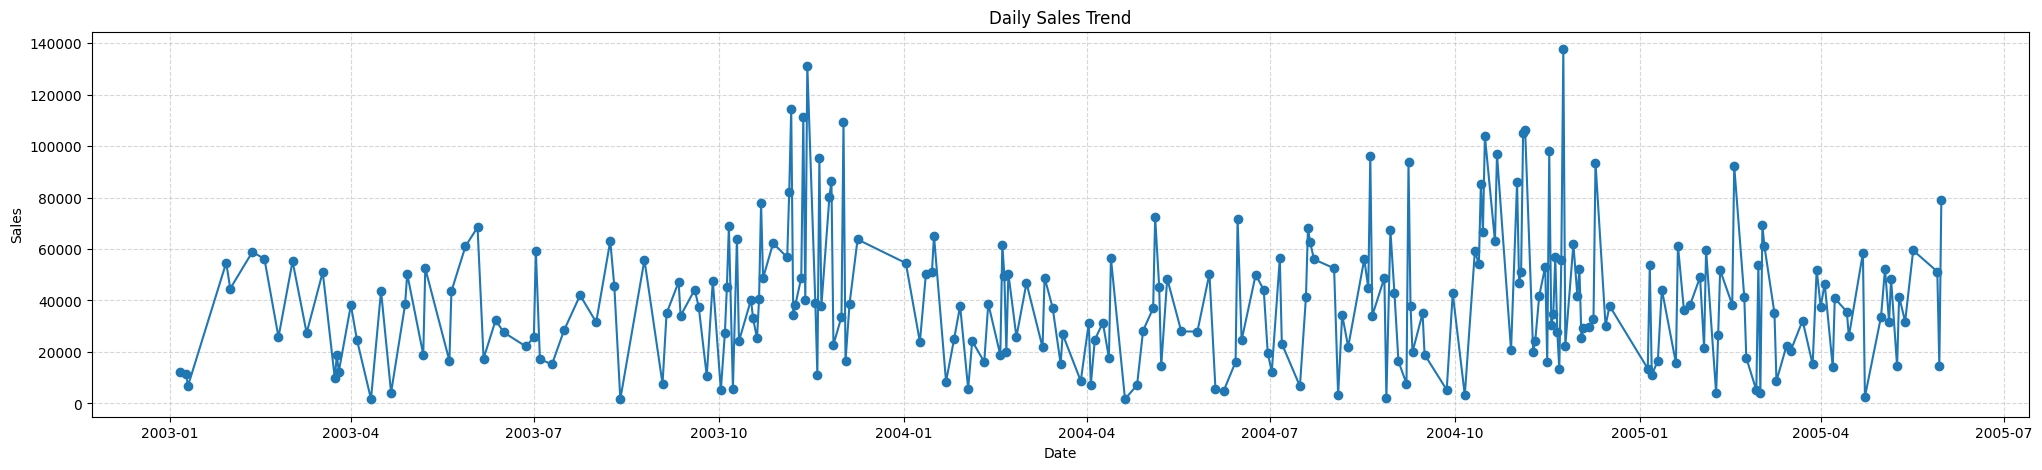

In [53]:
# Trend Analysis, forecasting, and seasonality
import matplotlib.pyplot as plt

# Aggregate sales by date (sum per day)
daily_sales = data1.groupby(data1['ORDERDATE'].dt.date)['SALES'].sum()

# Plot the daily sales trend
daily_sales.plot(figsize=(25,5), marker='o')
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

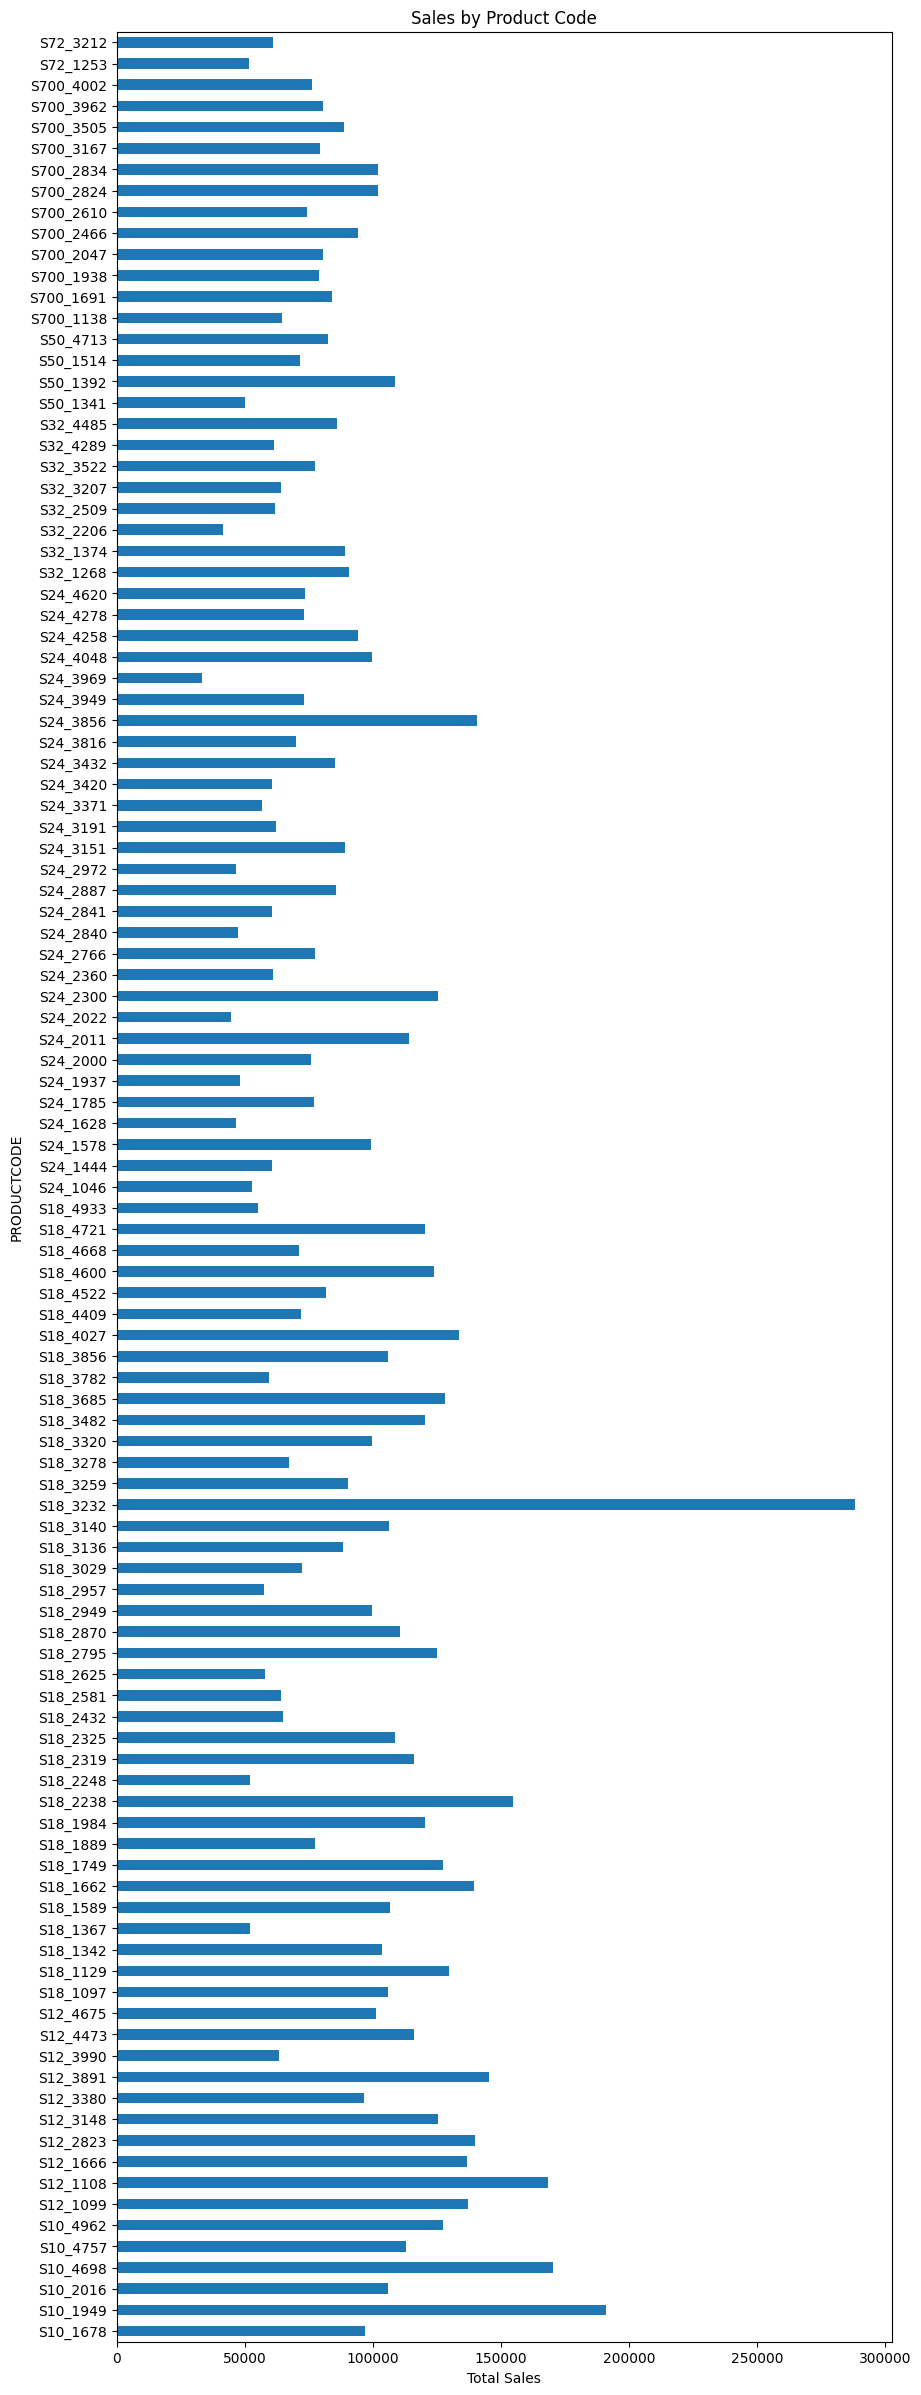

In [73]:
product_sales = data1.groupby('PRODUCTCODE')['SALES'].sum()
product_sales.plot(kind='barh', figsize=(10,30))
plt.title('Sales by Product Code')
plt.xlabel('Total Sales')
plt.show()

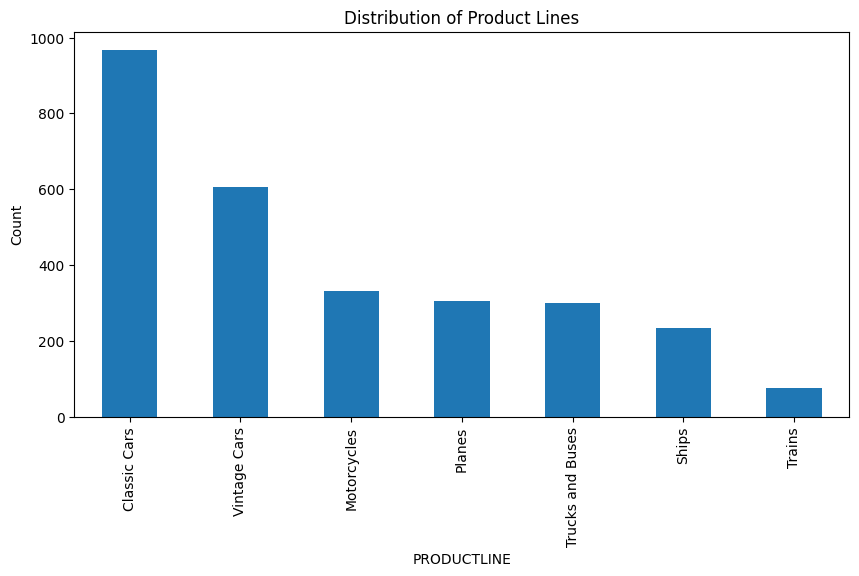

In [74]:
# Distribution Analysis
data1['PRODUCTLINE'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Product Lines')
plt.ylabel('Count')
plt.show()

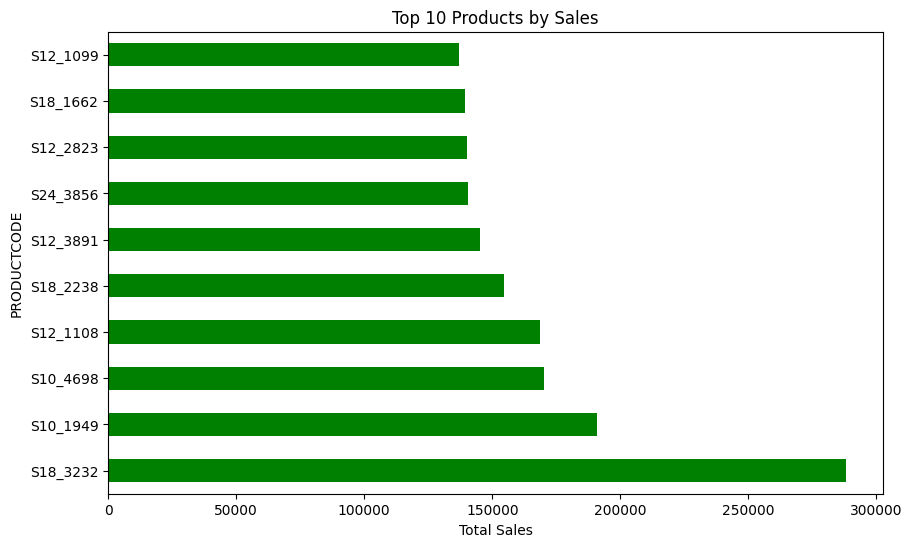

In [76]:
# Top 10 Products by Sales
top_10_products = product_sales.sort_values(ascending=False).head(10)
top_10_products.plot(kind='barh', figsize=(10,6), color='green')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.show() 